## Analisis de los datos

### DF

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_train_notclean=pd.read_csv('/content/drive/MyDrive/ies 2023/aprendisaje automatico/TP.TITANIC/bases de datos/train (sex).csv')
df_test_notclean=pd.read_csv('/content/drive/MyDrive/ies 2023/aprendisaje automatico/TP.TITANIC/bases de datos/test (sex).csv')
df_complete_notclean=pd.read_csv('/content/drive/MyDrive/ies 2023/aprendisaje automatico/TP.TITANIC/bases de datos/titanic3.csv')

In [ ]:
df_train_notclean.head()
print(df_train_notclean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [ ]:
df_test_notclean.head()
print(df_test_notclean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


In [ ]:

columnas_eliminar =['boat','body','home.dest']
df_complete_ce=df_complete_notclean.drop(columnas_eliminar,axis=1)
print(df_complete_ce.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   pclass    1309 non-null   int64 
 1   survived  1309 non-null   int64 
 2   name      1309 non-null   object
 3   sex       1309 non-null   object
 4   age       1046 non-null   object
 5   sibsp     1309 non-null   int64 
 6   parch     1309 non-null   int64 
 7   ticket    1309 non-null   object
 8   fare      1308 non-null   object
 9   cabin     295 non-null    object
 10  embarked  1307 non-null   object
dtypes: int64(4), object(7)
memory usage: 112.6+ KB
None


## Nulos

In [ ]:
pd.isnull(df_train_notclean).sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
pd.isnull(df_test_notclean).sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Pudimos previamente notar que los nulos se encuentra en las columnas sexo y cabina pero esta ultima no es tan importante como lo es sexo, por lo cual esta ultima sera el foco de nuestro pre procesamiento.


 ##Los datos vacios fueron remplazados por los promedios por clase y sexo en la tabla original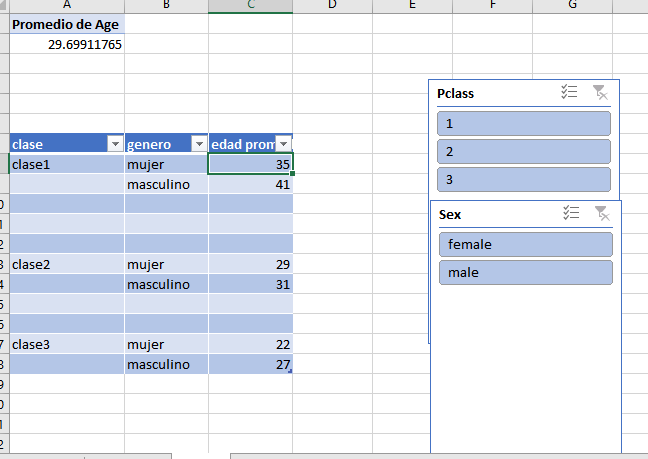

### Estadisticas

In [ ]:
df_train_notclean.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.349237,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.207716,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df_test_notclean.describe()

,PassengerId,Pclass,Sex,SibSp,Parch,Fare,Embarked
count,407.00000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000
mean,1102.41769,2.287469,0.636364,0.442260,0.388206,34.001863,1.378378
std,121.02995,0.835432,0.481638,0.904822,0.980931,53.714060,0.969650
min,892.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,997.50000,2.000000,0.000000,0.000000,0.000000,7.883350,1.000000
50%,1104.00000,3.000000,1.000000,0.000000,0.000000,14.108300,1.000000
75%,1207.50000,3.000000,1.000000,1.000000,0.000000,30.943750,1.000000
max,1309.00000,3.000000,1.000000,8.000000,9.000000,512.329200,3.000000


# Nueva sección

#PreProcesamiento de datos


Pasos:



1.  Cambiar la columna embarque y sexo por datos numericos
2.  Remplazar los datos faltantes(realizado en tablaoriginal) y agrupar la columna edad
3.  Eliminaremos la columna cabina,debido a que contiene muchos datos faltantes
4.  Eliminaremos las columnas que no sean necesarios para el analisis
5.  Eliminaremos las filas con los datos faltantes
6.  Elemento de lista


###Cambiar la columna embarque y sexo por datos numericos



In [ ]:
df_train_notclean['Sex'].replace(['female','male'],[0,1],inplace=True)
print(df_train_notclean['Sex'])

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    1
889    1
890    1
Name: Sex, Length: 869, dtype: int64


In [ ]:
df_test_notclean['Sex'].replace(['female','male'],[0,1],inplace=True)
print(df_train_notclean['Sex'])

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    1
889    1
890    1
Name: Sex, Length: 869, dtype: int64


In [ ]:
df_train_notclean['Embarked'].replace(['Q','S','C'],[0,1,3],inplace=True)
print(df_train_notclean['Embarked'])

0      1.0
1      3.0
2      1.0
3      1.0
4      1.0
      ... 
886    1.0
887    1.0
888    1.0
889    3.0
890    0.0
Name: Embarked, Length: 869, dtype: float64


In [ ]:
df_test_notclean['Embarked'].replace(['Q','S','C'],[0,1,3],inplace=True)
print(df_test_notclean['Embarked'])


0      0
1      1
3      1
4      1
5      1
      ..
413    1
414    3
415    1
416    1
417    3
Name: Embarked, Length: 407, dtype: int64


### Agrupamiento de edad

##Eliminaremos las columnas que no sean necesarios para el analisis


In [ ]:
df_train_notclean.drop(['Cabin'],axis=1,inplace=True)

#cabin tiene demasiados datos perdidos

In [ ]:
df_test_notclean.drop(['Cabin'],axis=1,inplace=True)

In [ ]:
df_train_notclean.dropna(axis=0,how='any', inplace=True)
df_test_notclean.dropna(axis=0,how='any', inplace=True)
#Eliminamos las filas con datos perdidos

In [ ]:
analisis_test=df_test_notclean.drop(['Name','Ticket'],axis=1)

In [ ]:
analisis_train=df_train_notclean.drop(['PassengerId','Name','Ticket'],axis=1)

# Verificacion

In [ ]:
(analisis_test).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 407 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  407 non-null    int64   
 1   Pclass       407 non-null    int64   
 2   Sex          407 non-null    int64   
 3   Age          407 non-null    category
 4   SibSp        407 non-null    int64   
 5   Parch        407 non-null    int64   
 6   Fare         407 non-null    float64 
 7   Embarked     407 non-null    int64   
dtypes: category(1), float64(1), int64(6)
memory usage: 26.0 KB


In [ ]:
analisis_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 869 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  869 non-null    int64   
 1   Pclass    869 non-null    int64   
 2   Sex       869 non-null    int64   
 3   Age       869 non-null    category
 4   SibSp     869 non-null    int64   
 5   Parch     869 non-null    int64   
 6   Fare      869 non-null    float64 
 7   Embarked  869 non-null    float64 
dtypes: category(1), float64(2), int64(5)
memory usage: 55.4 KB


In [ ]:
pd.isnull(analisis_test).sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [ ]:
analisis_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,4,1,0,7.2500,1.0
1,1,1,0,6,1,0,71.2833,3.0
2,1,3,0,6,0,0,7.9250,1.0
3,1,1,0,6,1,0,53.1000,1.0
4,0,3,1,6,0,0,8.0500,1.0


In [ ]:
analisis_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,6,0,0,7.8292,0
1,893,3,0,7,1,0,7.0000,1
3,895,3,1,6,0,0,8.6625,1
4,896,3,0,4,1,1,12.2875,1
5,897,3,1,2,0,0,9.2250,1


In [ ]:
from google.colab import files
ruta_archivo = '"C:Analisis_train".csv'
analisis_train.to_csv(ruta_archivo, index=False)
files.download(ruta_archivo)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files

ruta_archivo = '"C:Analisis_test".csv'
analisis_test.to_csv(ruta_archivo, index=False)
files.download(ruta_archivo)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>